In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [56]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test.drop(["Clearsky DHI","Clearsky DNI","Clearsky GHI"],axis=1,inplace=True)
test_y = pd.read_csv("sample_submission.csv")

test = pd.concat([test,test_y],axis=1)

In [57]:
# Since time information is not important, we can drop it.
Time_columns = ["Year","Month","Hour","Minute"]

train.drop(Time_columns,axis=1,inplace=True)
test.drop(Time_columns,axis=1,inplace=True)

In [58]:
Scaler = MinMaxScaler()

In [59]:
train_GHI = train["Clearsky GHI"].values
train.drop(["Clearsky GHI"],axis=1,inplace=True)

test_GHI = test["Clearsky GHI"].values

test.drop(["Clearsky GHI"],axis=1,inplace=True)

train_GHI = Scaler.fit_transform(train_GHI.reshape(-1,1))
test_GHI = Scaler.fit_transform(test_GHI.reshape(-1,1))


In [60]:

Errors_rmse_GHI = []
all_columns = train.columns
Solar_zenith = ["Solar Zenith Angle"]
solar_temp = ["Solar Zenith Angle","Temperature"]


In [61]:
def Prepare_Train_Test(train,test,columns):
    Scaler = MinMaxScaler()
    train_x = Scaler.fit_transform(train[columns].values)
    test_x = Scaler.fit_transform(test[columns].values)

    return train_x,test_x

# Setting 1 : All Columns

In [62]:
train_x,test_x = Prepare_Train_Test(train,test,all_columns)
lr_GHI = LinearRegression()
lr_GHI.fit(train_x,train_GHI)
preds_GHI = lr_GHI.predict(test_x)
rmse = mean_squared_error(preds_GHI,test_GHI) 
print(rmse)

Errors_rmse_GHI.append(rmse)

0.004879926671430809


# Setting 2 : Most Correlated Column

In [63]:
train_x,test_x = Prepare_Train_Test(train,test,Solar_zenith)

train_x = train_x.reshape(-1,1)
test_x = test_x.reshape(-1,1)

lr_GHI = LinearRegression()
lr_GHI.fit(train_x,train_GHI)
preds_GHI = lr_GHI.predict(test_x)

rmse = mean_squared_error(preds_GHI,test_GHI) 
print(rmse)

Errors_rmse_GHI.append(rmse)

0.13286207496031005


# Setting 3 : Most Correlated 2 Columns

In [64]:
train_x,test_x = Prepare_Train_Test(train,test,solar_temp)
lr_GHI = LinearRegression()
lr_GHI.fit(train_x,train_GHI)
preds_GHI = lr_GHI.predict(test_x)
rmse = mean_squared_error(preds_GHI,test_GHI) 
print(rmse)

Errors_rmse_GHI.append(rmse)

0.13314732216660624


# Setting 4 : Polynomial Regression for Most Correlated Column


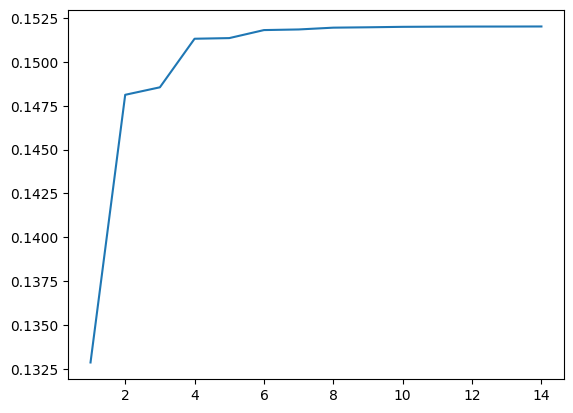

In [65]:
train_x,test_x = Prepare_Train_Test(train,test,Solar_zenith)

rmse_poly = []
for i in range(1,15):

    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(train_x)
    lr_GHI = LinearRegression()
    lr_GHI.fit(x_poly,train_GHI)

    x_test_poly = poly.transform(test_x)

    preds_GHI = lr_GHI.predict(x_test_poly)

    rmse = mean_squared_error(preds_GHI,test_GHI)

    rmse_poly.append(rmse)


plt.plot(range(1,15),rmse_poly)

Errors_rmse_GHI.append(rmse_poly[0])


Lowest error occured when degree = 1, which equals to simple linear regression with solar zenith angle column.

# Final comparison

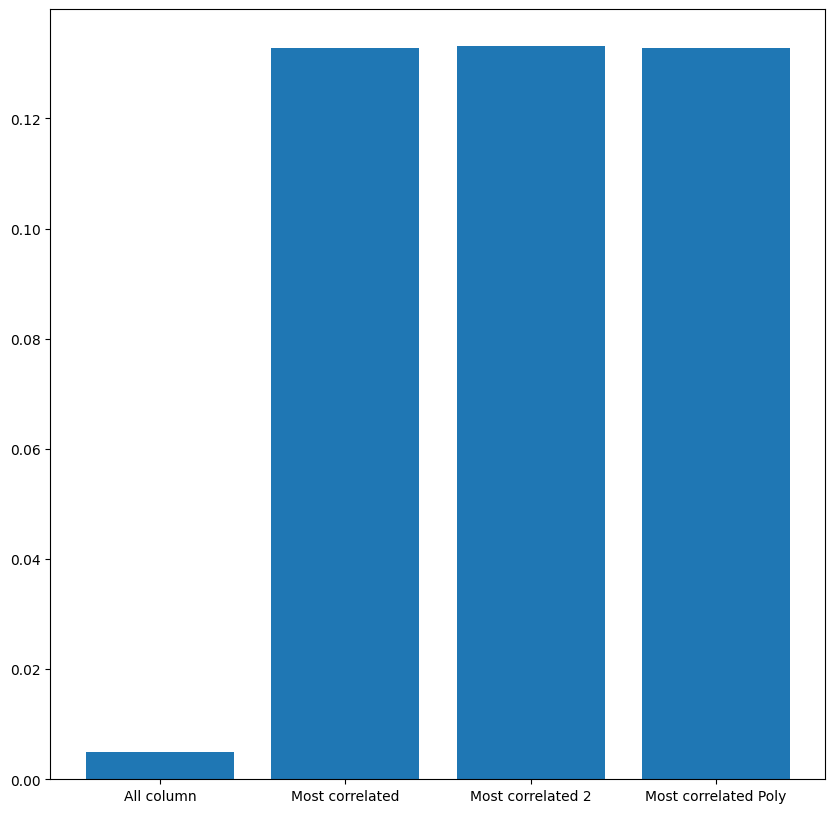

In [68]:
Settings = ["All column","Most correlated","Most correlated 2","Most correlated Poly"]
fig = plt.figure(figsize=(10,10))
plt.bar(Settings,Errors_rmse_GHI)
plt.show()

Lowest Rmse score is obtained when all columns are used in Linear Regression.